# Harjoitus 2
## Tehtävä 1
### a)

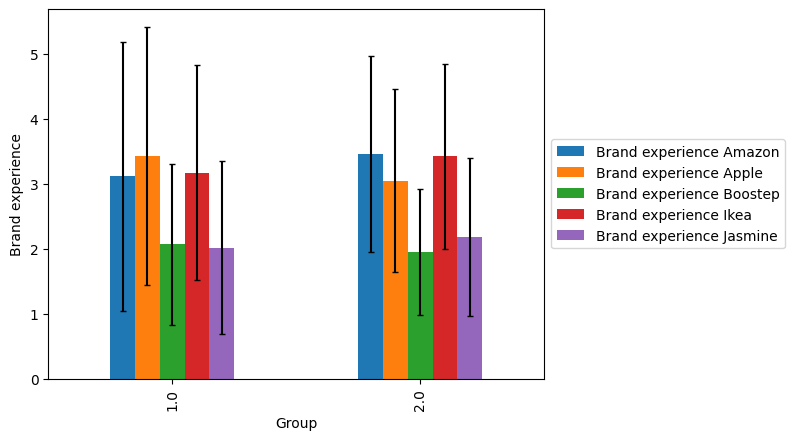

In [49]:
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt

df_brands, meta = pyreadstat.read_sav("../data/brands.sav")
df_brands.columns = meta.column_labels  # nimetään sarakkeet järkevimmiksi
brand_labels = ["Brand experience Amazon", "Brand experience Jasmine", "Brand experience Apple", "Brand experience Boostep", "Brand experience Ikea"]
df_experiences = df_brands[brand_labels + ["Group"]]

# statistiikkaa
experiences_mean = df_experiences.pivot_table(index="Group", values=brand_labels, aggfunc="mean")
experiences_std = df_experiences.pivot_table(index="Group", values=brand_labels, aggfunc="std")

# visualisointi
experiences_mean.plot(kind="bar", yerr=2*experiences_std, ylabel="Brand experience", capsize=2)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

N.B.: Jouduin lukemaan tehtävänannon monta kertaa, ennen kuin ymmärsin sen mielestäni. Toivottavasti yllä on nyt sitä mitä haetaan, mutta jos tehtävän luonteen huomioi, niin yllä oleva kuva on asianmukainen.

Kuvaajasta nähdään, että brändien väliset vaihtelut ryhmien kesken on luonteeltaan samanlaista. Boostep ja Jasmine ovat keskiarvoltaan pienimpiä, kuin muut brändit, ja keskenään samaa suuruusluokkaa. Vastaavasti muut brändit (Amazon, Apple ja Ikea) ovat keskenään samaa suuruusluokkaa kummassakin ryhmässä. Luottamusväli (kuvassa ilmoitettu on oikeasti 95,5%, mutta tämä on yleinen konventio) on kummassakin ryhmässä kaikkissa brändeissä suhteellisen suurta, mutta ne antavat osviittaa siitä, mistä perusjoukon keskiarvot jokaiselle brändille voidaan löytää 95% luottamuksella. Huomiona vielä, että testijoukko on suhteellisen pieni (N=20 per ryhmä), mikä myös selittää laajat luottamusvälit. Brändikokemuksissa ei siis ole havaittavissa merkittäviä eroja testiryhmien välillä.

### b)

Nollahypoteesi: Boostepin ja Jasminen brändikokemukset __eivät__ eroa toisistaan.

Koska a-kohdan perusteella ryhmien välillä ei ollut merkittävää eroa brändikokemuksissa, on perusteltua yhdistää testijoukkojen tulokset brändikokemuksista yhdeksi datajoukoksi. Tarkastellaan ensiksi riippuvien muuttujien jakaumaa.

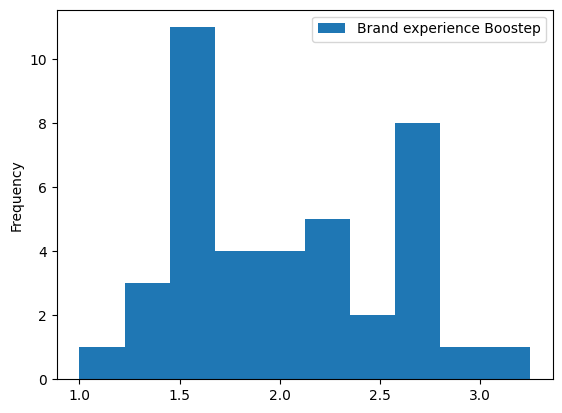

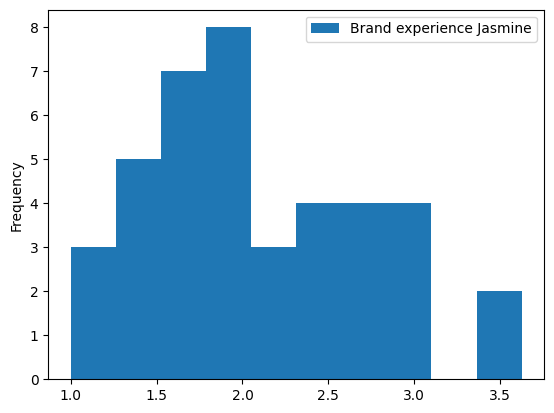

In [50]:
df_experiences[["Brand experience Boostep"]].plot(kind="hist")
plt.show()
df_experiences[["Brand experience Jasmine"]].plot(kind="hist")
plt.show()

Silmiä hieman siristämällä, arvioidaan jakaumat normaalijakaumiksi. Koska tarkasteltavat muuttujat ovat jatkuvia, vertailtavia luokkia on kaksi ja kyseessä on ryhmien välinen asetelma, valitaan testiksi kahden riippumattomat otoksen t-testi.

In [51]:
from scipy.stats import ttest_ind

tstat, pvalue = ttest_ind(df_experiences[["Brand experience Boostep"]], df_experiences[["Brand experience Jasmine"]])
print(f"t = {tstat}; p = {pvalue}")

t = [-0.6823372]; p = [0.49704715]


Koska p-arvo on nyt selvästi > 0,05, eli ero ei ole merkitsevä. Nollahypoteesia ei hylätä, eli brändikokemukset Boostepin ja Jasminen välillä eivät eroa toisistaan merkitsevästi. Tämä havainto ei ole ristiriidassa kohdan a) kanssa.

### c)

Nollahypoteesi: Amazonin ja Jasminen brändikokemukset __eivät__ eroa toisistaan.

Tarkastellaan Amazonin brändikokemusten jakaumaa.

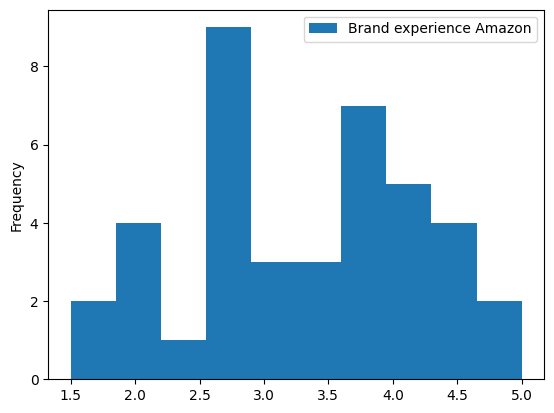

In [52]:
df_experiences[["Brand experience Amazon"]].plot(kind="hist")
plt.show()

Kuvaajan perusteella, oletetaan Amazoniin liittyvä brändikokemus myös normaalijakautuneeksi. Samin perustein, kuin b-kohdassakin, valitaan testiksi kahden riippumattoman otoksen t-testi.

In [124]:
tstat, pvalue = ttest_ind(df_experiences[["Brand experience Amazon"]], df_experiences[["Brand experience Jasmine"]])
print(f"t = {tstat}; p = {pvalue}")

t = [6.77332028]; p = [2.11999689e-09]


Koska p-arvo on nyt selvästi << 0,05, voimme hylätä nollahypoteesin ja todeta, että Amazonin ja Jasminen brändikokemusten välillä on merkitsevä ero (tulos on tilastollisesti merkitsevä). Lasketaan efektin koko ja suunta (joka voidaan tehdä, koska jakaumien ero on tilastollisesti merkitsevä):

In [65]:
def calc_cohens_d(mean_1, mean_2, std_1, std_2):
    cohens_d = (mean_1 - mean_2) / np.sqrt((std_1**2 + std_2**2) / 2)
    
    return cohens_d

cohens_d = calc_cohens_d(df_experiences["Brand experience Amazon"].mean(),
              df_experiences["Brand experience Jasmine"].mean(),
              df_experiences["Brand experience Amazon"].std(),
              df_experiences["Brand experience Jasmine"].std())

print(f"d = {cohens_d}")

d = 1.5145604572017886


Koska Cohenin d-arvo on > 0.8, efektin koko on suuri. Käyttäjien kokema brändikokemus Amazonin kohdalla on suurempaa, kuin Jasminen kohdalla.

## Tehtävä 2

Ladataan aineisto käyttöön ja osioidaan se käsittelyn helpottamiseksi. Putsataan aineisto myös, jos siinä on puuttuvia kohtia (sukupuoli tai yhtk.kiinnostus).

In [79]:
df_baro, meta_baro = pyreadstat.read_sav("../data/tiede_baro_2019.sav")
baro_kiinnostus = df_baro[["sukupuoli", "yhtk.kiinnostus"]].dropna()

print(f"Poistettuja rivejä: {df_baro[['sukupuoli', 'yhtk.kiinnostus']].shape[0] - baro_kiinnostus.shape[0]}")

Poistettuja rivejä: 39


In [89]:
print(f"Miehiä: {baro_kiinnostus[baro_kiinnostus['sukupuoli'] == 1].shape[0]}")
print(f"Naisia: {baro_kiinnostus[baro_kiinnostus['sukupuoli'] == 2].shape[0]}")
print(f"Muu: {baro_kiinnostus[baro_kiinnostus['sukupuoli'] == 3].shape[0]}")

Miehiä: 1102
Naisia: 1068
Muu: 0


Miehiä ja naisia on lähestulkoon sama määrä, joten näiden kahden ryhmän välinen vertailu on mielekästä. Lisäksi, muu-sukupuolisia ei tutkimuksessa esiintynyt.

Tarkastellaan seuraavaksi jakautuuko käsiteltävä aineisto miten.

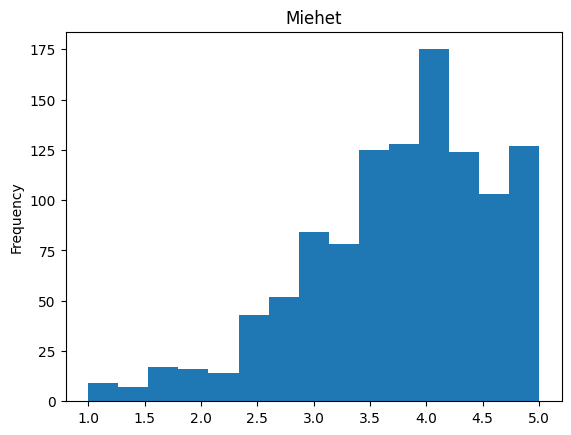

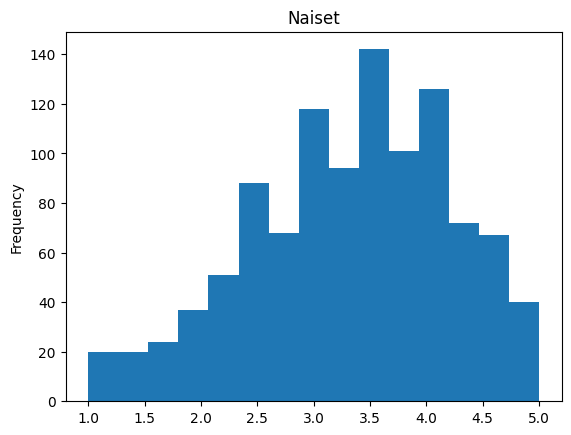

In [104]:
baro_kiinnostus[baro_kiinnostus['sukupuoli'] == 1]['yhtk.kiinnostus'].plot(kind="hist", bins=15, xlabel="yhtk.kiinnostus", title="Miehet")
plt.show()
baro_kiinnostus[baro_kiinnostus['sukupuoli'] == 2]['yhtk.kiinnostus'].plot(kind="hist", bins=15, xlabel="yhtk.kiinnostus", title="Naiset")
plt.show()

Yllä olevan perusteella, jakaumat ovat vinoja---niissä on selvästi häntä vasemmalla (selkeämpi miesten kohdalla). Täytyy siis käyttää epämarametristä testiä. Koska tarkkailusa on kaksi luokkaa ja ryhmien välinen asetelma, päädymme käyttämään Mann-Whitney U -testiä. 

(Tässä kohtaa heräsikin kysymys: mitä jos kaksi tarkkailtavaa jakaumaa ovat erilaisia, esimerkiksi toinen on selvästi normaalijakautunut ja toinen vino? Oma intuitio sanoo, että silloin käytetään epämarametristä testiä myös.)

Testattava nollahypoteesi: miesten ja naisten välillä ei ole eroa kiinnostuksessa yhteiskunnallisia asioita kohtaan.

In [138]:
from scipy.stats import mannwhitneyu

mwuvalue, pvalue = mannwhitneyu(
    baro_kiinnostus[baro_kiinnostus['sukupuoli'] == 1]['yhtk.kiinnostus'],
    baro_kiinnostus[baro_kiinnostus['sukupuoli'] == 2]['yhtk.kiinnostus'],
    alternative="two-sided"  # koska vaihtoehtoinen hypoteesi on, että jakaumat eivät ole samat
    )

print(f"p = {pvalue}")

p = 1.902004347445404e-30


Koska tulos on tilastollisesti merkitsevä (p << 0,05), voimme hylätä nollahypoteesin ja saamme tukea vaihtoehtoiselle hypoteesille, eli jakaumissa on eroa---ne eivät ole tilastollisesti samat.

Efektin suuruuden ja suunnan laskemiseksi käytämme Cliffin deltaa, joka on suoraviivaista laskea, kun Mann-Whitneyn palauttama u-arvo tiedetään:

In [140]:
d_cliff = (2*mwuvalue) / (
    baro_kiinnostus[baro_kiinnostus['sukupuoli'] == 1]['yhtk.kiinnostus'].shape[0] * 
    baro_kiinnostus[baro_kiinnostus['sukupuoli'] == 2]['yhtk.kiinnostus'].shape[0]) - 1

print(f"Efekti: {d_cliff}")

Efekti: 0.2831198977684428


Cliffin deltaa tulkitaan seuraavalla tavalla: sen vaihteluväli on -1 ja 1 välillä ja se on jatkuva. Jos sen arvo on 1, se tarkoittaa, että kaikki ensimmäisen ryhmän (tässä miehet) havainnot ovat suurempia kuin toisen ryhmän, ja -1 tarkoittaa, että kaikki ovat pienempiä. 1 ja -1 tapauksessa, kaksi tarkasteltavaa jakaumaa eivät ole lainkaan päällekkäin. Kun arvo on 0, niin silloin jakaumat ovat samat. Eli jos p-arvo on merkitsevä, niin silloin Cliffin delta ei ole 0. Saatua Cliffin deltan arvoa tulkitaan niin, että efektin koko on kohtalainen ja miesten antamat vastaukset ovat jokseenkiin suurempia arvoltaan, kuin naisten. Tämä tulos on ainakin sopusoinnussa yllä olevien histogrammien suhteen. Se mikä tässä itseäni ihmetyttää, on todella pieni p-arvo. Tällöin voisi kuvitella, että Cliffin delta pitäisi lähestyä joko -1 tai 1 ainakin tämän lähteen mukaan: http://www.scielo.org.co/pdf/rups/v10n2/v10n2a18.pdf

## Tehtävä 3
### a)

Otetaan käsittelyyn datan olennaiset osat ja putsataan se riveistä, joista puuttuu vastauksia.

In [147]:
baro_huoli = df_baro[["ammattikoulutus", "huoli.teknologisoitumisesta"]].dropna()
print(f"Poistettuja rivejä: {df_baro[['ammattikoulutus', 'huoli.teknologisoitumisesta']].shape[0] - baro_huoli.shape[0]}")

Poistettuja rivejä: 1187


Huomioidaan tässä kohtaa, että puolet alkuperäisestä aineistosta jätetään analyysista pois puuttuvat datan takia. Tämä voi johtua summamuuttujan luonteesta, joka on puuttuvat (NaN) silloin, kun mikä tahansa summattavsita on myös NaN (oletettavasti).

Pivotoidaan seuraavaksi dataa ja tehdään pylväsdiagrammi.

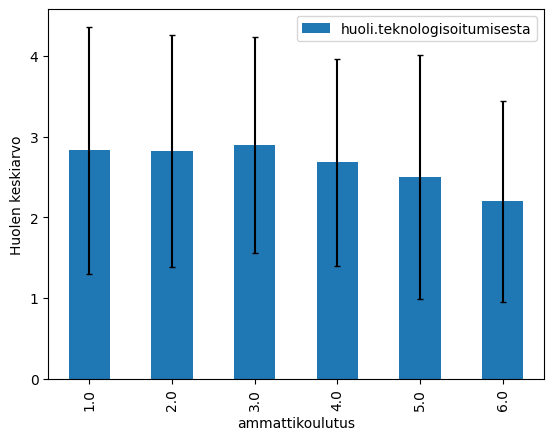

Selitteet: {1.0: 'ei ammatillista koulutusta', 2.0: 'ammattikurssi, muu lyhyt ammattikoulutus', 3.0: 'ammattikoulu, kouluasteen ammatillinen tutkinto', 4.0: 'opistotasoinen ammattikoulutus', 5.0: 'ammattikorkeakoulututkinto', 6.0: 'yliopisto- tai korkeakoulututkinto'}


In [175]:
huoli_mean = baro_huoli.pivot_table(index="ammattikoulutus", aggfunc="mean")
huoli_std = baro_huoli.pivot_table(index="ammattikoulutus", aggfunc="std")
huoli_mean.plot(kind="bar", yerr=huoli_std * 2, capsize=2, ylabel="Huolen keskiarvo")
plt.show()
print(f"Selitteet: {meta_baro.value_labels['labels4']}")

Pylväsdiagrammista nähdään, että vaihtelua ammattiluokkien kesken ei ole kolmen ensimmäisen luokan välillä kovin pajoa (ei ammatillista koulutusta, ammattikurssi, muu lyhyt ammattikoulutus, ammattikoulu, kouluasteen ammatillinen tutkinto), mutta kolmen viimeisen luokan kohdalla (opistotasoinen ammattikoulutus, ammattikorkeakoulututkinto, yliopisto- tai korkeakoulututkinto) huolen keskiarvo vaikuttaa laskevan hieman, kun siirrymme kohti korekampaa koulutusastetta. Jokaisen luokan huolen keskiarvon 95,5% luottamusvälit ovat myö melko suuria.

### b)

Nollahypoteesi: huolen kokeminen ei eroa koulutusasteiden luokkien välillä.

